#### 1.Load dataset

In [11]:
#### read TCGA_COAD data ####
COAD_UCSC_Toil_tpm_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/UCSC_Toil/COAD_UCSC_Toil_tpm_dataset_merge.syn2623706.rds")
COAD_RSEM_gene_tpm <- COAD_UCSC_Toil_tpm_dataset$COAD.RSEM.gene.tpm
gencode.v23.annotation <- COAD_UCSC_Toil_tpm_dataset$gencode.v23.annotation
COAD.pheno <- COAD_UCSC_Toil_tpm_dataset$COAD.pheno.merge.syn2623706
#head(gencode.v23.annotation)
## convert ensembleID to symbol 
geneMatch <- match(rownames(COAD_RSEM_gene_tpm),gencode.v23.annotation$V1)
geneSymbol <- as.character(gencode.v23.annotation[geneMatch,]$V2)
COAD_tpm_symbol <- COAD_RSEM_gene_tpm
rownames(COAD_tpm_symbol) <- geneSymbol
#head(COAD_tpm_symbol)
## Read log10(x+1) transformed scReference 

#### Load scReference V5 
scReference.log10.CV <- readRDS("/data8t_4/JH/MyJobs/Normal_cell_reference/Step2_Merge_and_Filter_the_scReference/2020_1_29_scReferenceV5.Subset.Features.log10.CV.rds")
scReference.list.log10.CV8000 <- scReference.log10.CV$scReference.list.log10.CV8000
scReference.list.log10.CV4500 <- scReference.log10.CV$scReference.list.log10.CV4500
scReference.list.log10.CV4000 <- scReference.log10.CV$scReference.list.log10.CV4000
scReference.list.log10.CV3500 <- scReference.log10.CV$scReference.list.log10.CV3500
scReference.list.log10.CV3000 <- scReference.log10.CV$scReference.list.log10.CV3000
scReference.list.log10.CV2500 <- scReference.log10.CV$scReference.list.log10.CV2500
scReference.list.log10.CV2000 <- scReference.log10.CV$scReference.list.log10.CV2000


#### 2.Distance calculation

In [12]:
### Distance calculation
##### Distance calculation 
source("/data8t_4/JH/MyJobs/1_R_script/NormalCancer/refCorMerge.R")
### 
##### Transform COAD data
#summary(colSums(COAD_tpm_symbol)) ### So its not log2 transformed
# Expression data transformation Log(x+1)
Log10.expList <- list(COAD_tpm_symbol = log10(COAD_tpm_symbol+1))
Cor.Res.CV8000 <- refCorMerge(Log10.expList, scReference.list.log10.CV8000)
Cor.Res.CV4500 <- refCorMerge(Log10.expList, scReference.list.log10.CV4500)
Cor.Res.CV4000 <- refCorMerge(Log10.expList, scReference.list.log10.CV4000)
Cor.Res.CV3500 <- refCorMerge(Log10.expList, scReference.list.log10.CV3500)
Cor.Res.CV3000 <- refCorMerge(Log10.expList, scReference.list.log10.CV3000)
Cor.Res.CV2500 <- refCorMerge(Log10.expList, scReference.list.log10.CV2500)
Cor.Res.CV2000 <- refCorMerge(Log10.expList, scReference.list.log10.CV2000)

[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"
[1] "Using 10 parallel cores"


### All samples 

#### step1. Normalization 

In [13]:
Trans.Rang1.cv8000<- base::apply(Cor.Res.CV8000$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv4500<- base::apply(Cor.Res.CV4500$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv4000<- base::apply(Cor.Res.CV4000$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv3500<- base::apply(Cor.Res.CV3500$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv3000<- base::apply(Cor.Res.CV3000$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv2500<- base::apply(Cor.Res.CV2500$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv2000<- base::apply(Cor.Res.CV2000$Cor.merged, 1, function(x){
  (x-min(x))/(max(x)-min(x))
})
Trans.Rang1.cv8000 <- t(Trans.Rang1.cv8000)
Trans.Rang1.cv4500 <- t(Trans.Rang1.cv4500)
Trans.Rang1.cv4000 <- t(Trans.Rang1.cv4000)
Trans.Rang1.cv3500 <- t(Trans.Rang1.cv3500)
Trans.Rang1.cv3000 <- t(Trans.Rang1.cv3000)
Trans.Rang1.cv2500 <- t(Trans.Rang1.cv2500)
Trans.Rang1.cv2000 <- t(Trans.Rang1.cv2000)

#### Step2.Cluster 

In [15]:
colnames(COAD.pheno)

[1] "sample.x"                            "X_PATIENT"                          
 [3] "cancer.type.abbreviation"            "age_at_initial_pathologic_diagnosis"
 [5] "gender.x"                            "race"                               
 [7] "ajcc_pathologic_tumor_stage"         "clinical_stage"                     
 [9] "histological_type"                   "histological_grade"                 
[11] "initial_pathologic_dx_year"          "menopause_status"                   
[13] "birth_days_to"                       "vital_status"                       
[15] "tumor_status"                        "last_contact_days_to"               
[17] "death_days_to"                       "cause_of_death"                     
[19] "new_tumor_event_type"                "new_tumor_event_site"               
[21] "new_tumor_event_site_other"          "new_tumor_event_dx_days_to"         
[23] "treatment_outcome_first_course"      "margin_status"                      
[25] "residual_tumor"                      "OS"                                 
[27] "OS.time"                             "DSS"                                
[29] "DSS.time"                            "DFI"                                
[31] "DFI.time"                            "PFI"                                
[33] "PFI.time"                            "Redaction"                          
[35] "sampleID"                            "sample.y"                           
[37] "dataset"                             "age"                                
[39] "gender.y"                            "stage"                              
[41] "pt"                                  "pn"                                 
[43] "pm"                                  "tnm"                                
[45] "grade"                               "msi"                                
[47] "cimp"                                "kras_mut"                           
[49] "braf_mut"                            "cms_label"                          
[51] "osMo"                                "osStat"                             
[53] "rfsMo"                               "rfsStat"                            
[55] "sampleTypes"

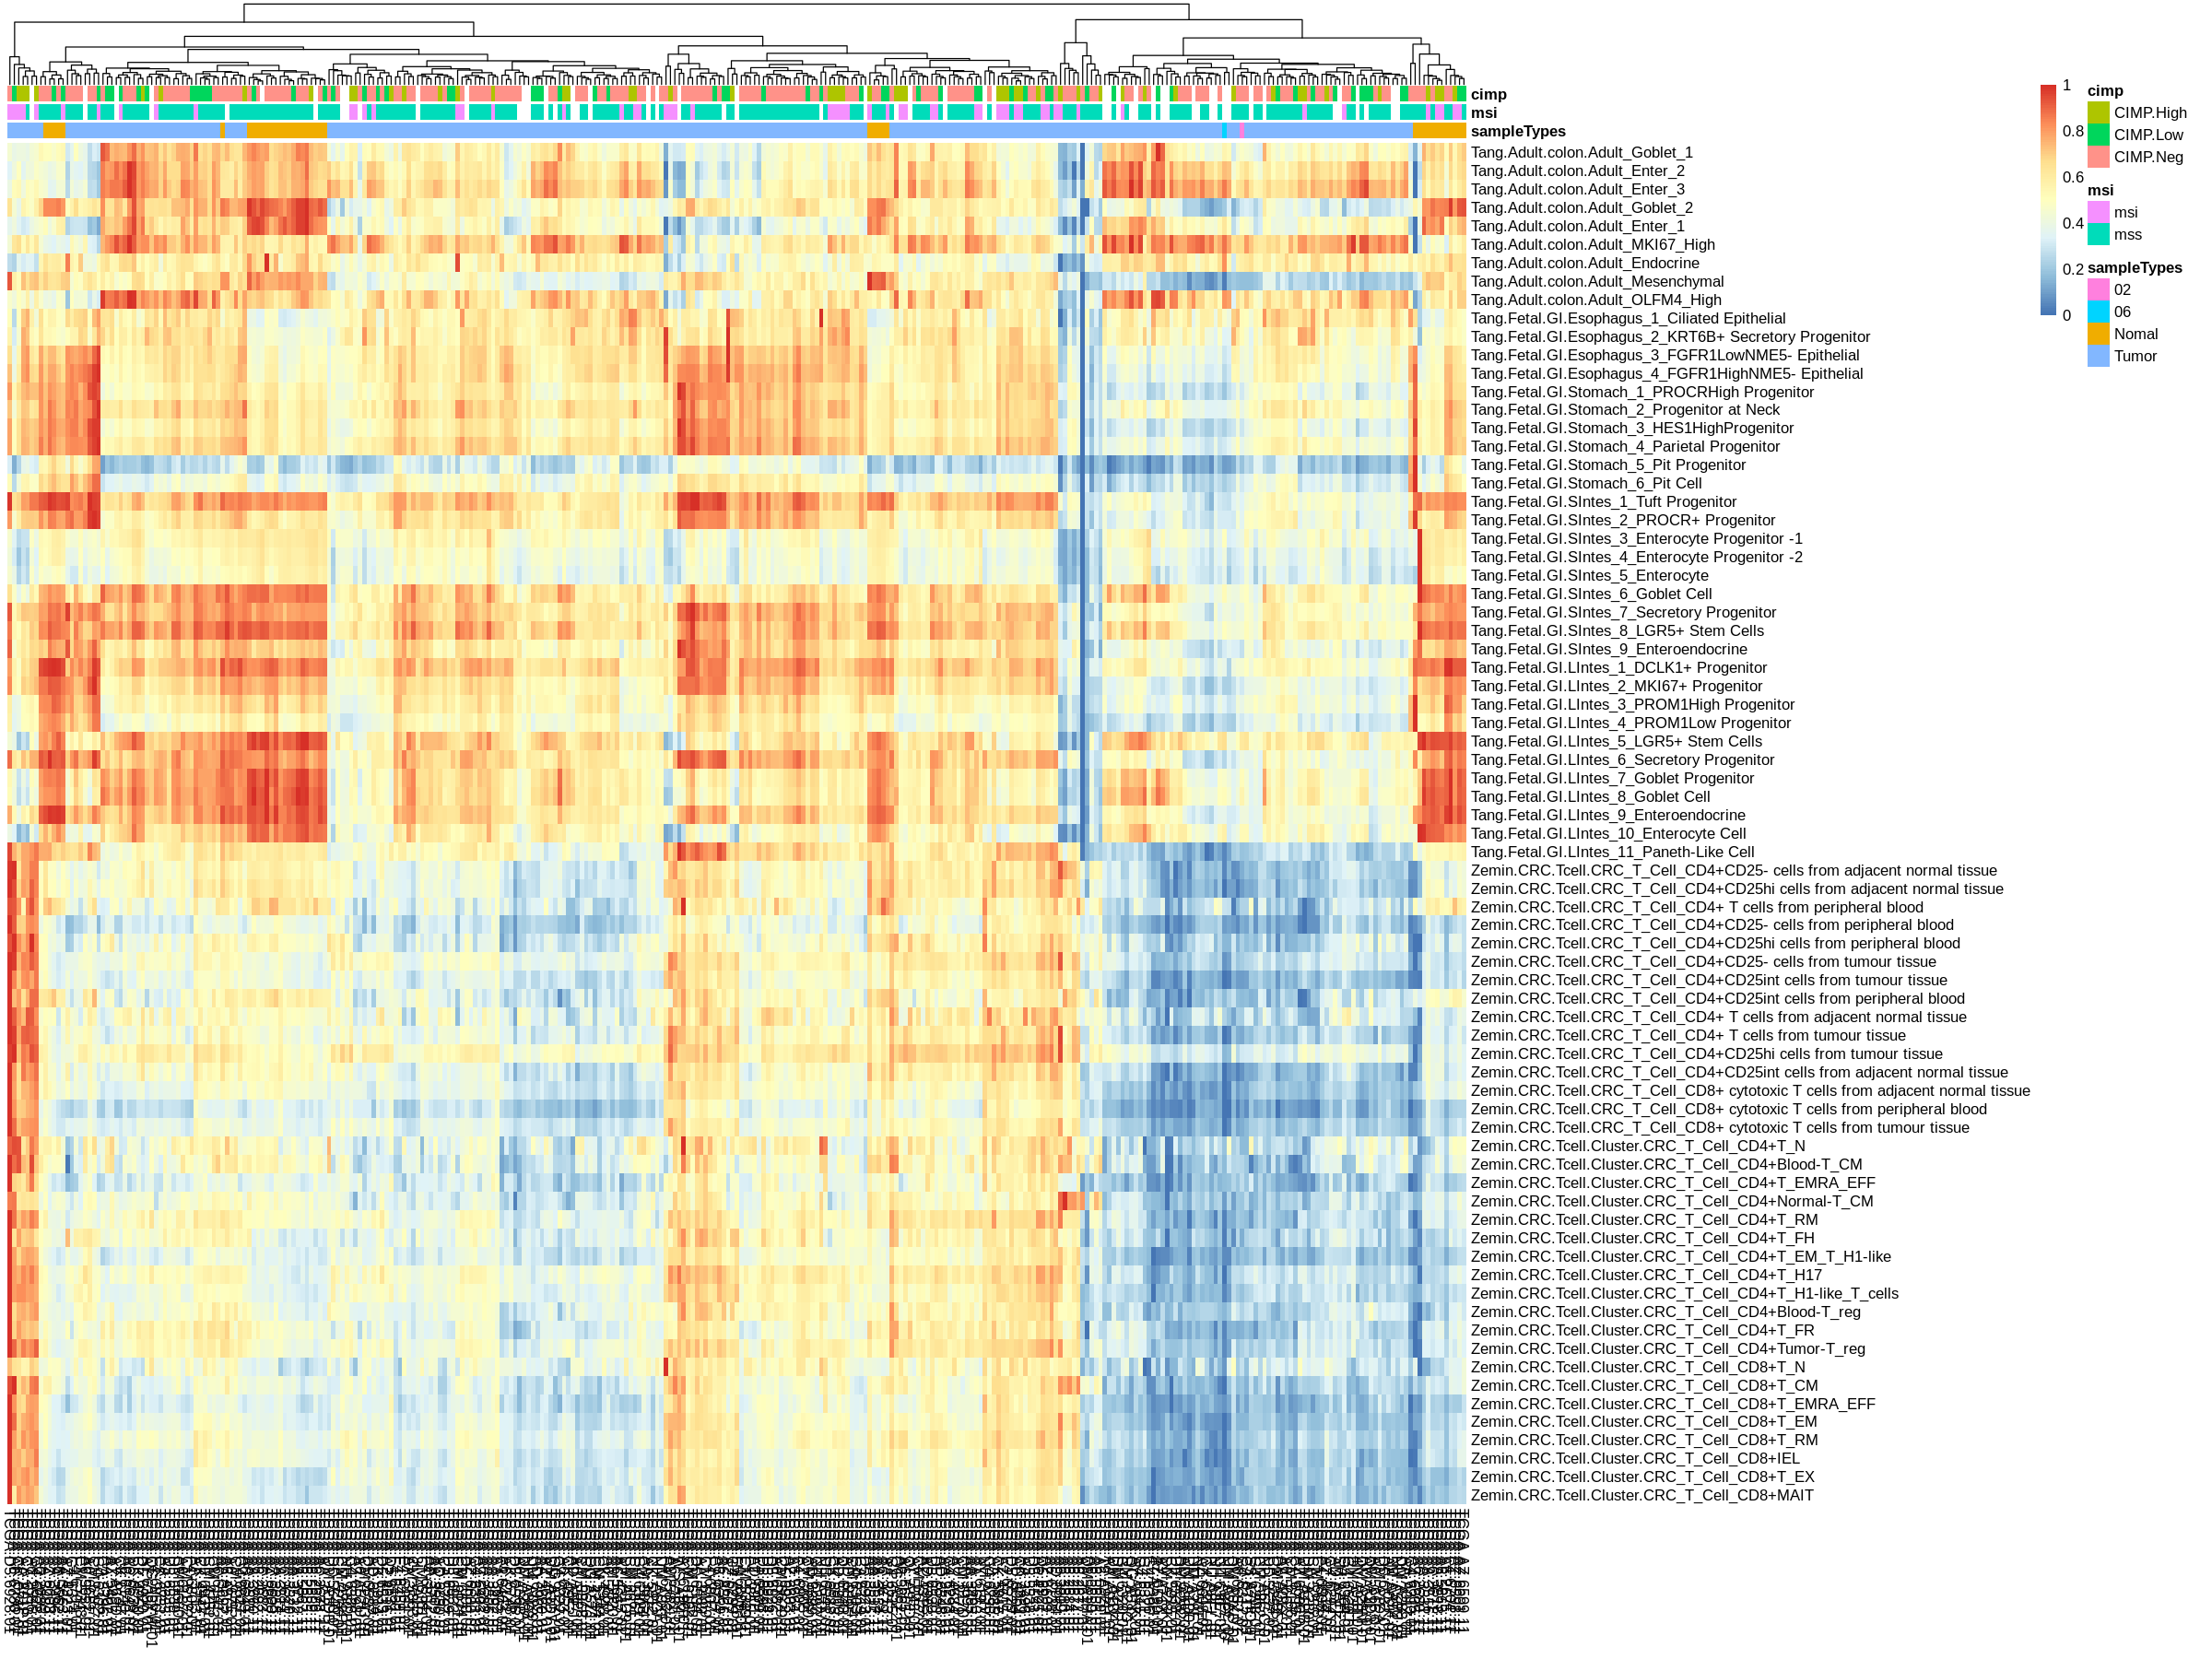

In [17]:
##### 8000
options(repr.plot.width=20, repr.plot.height=15)
pheatmap::pheatmap(Trans.Rang1.cv8000,annotation_col = COAD.pheno[,c("sampleTypes","msi","cimp")],
                   show_colnames = T,cluster_rows = F,scale = "none")

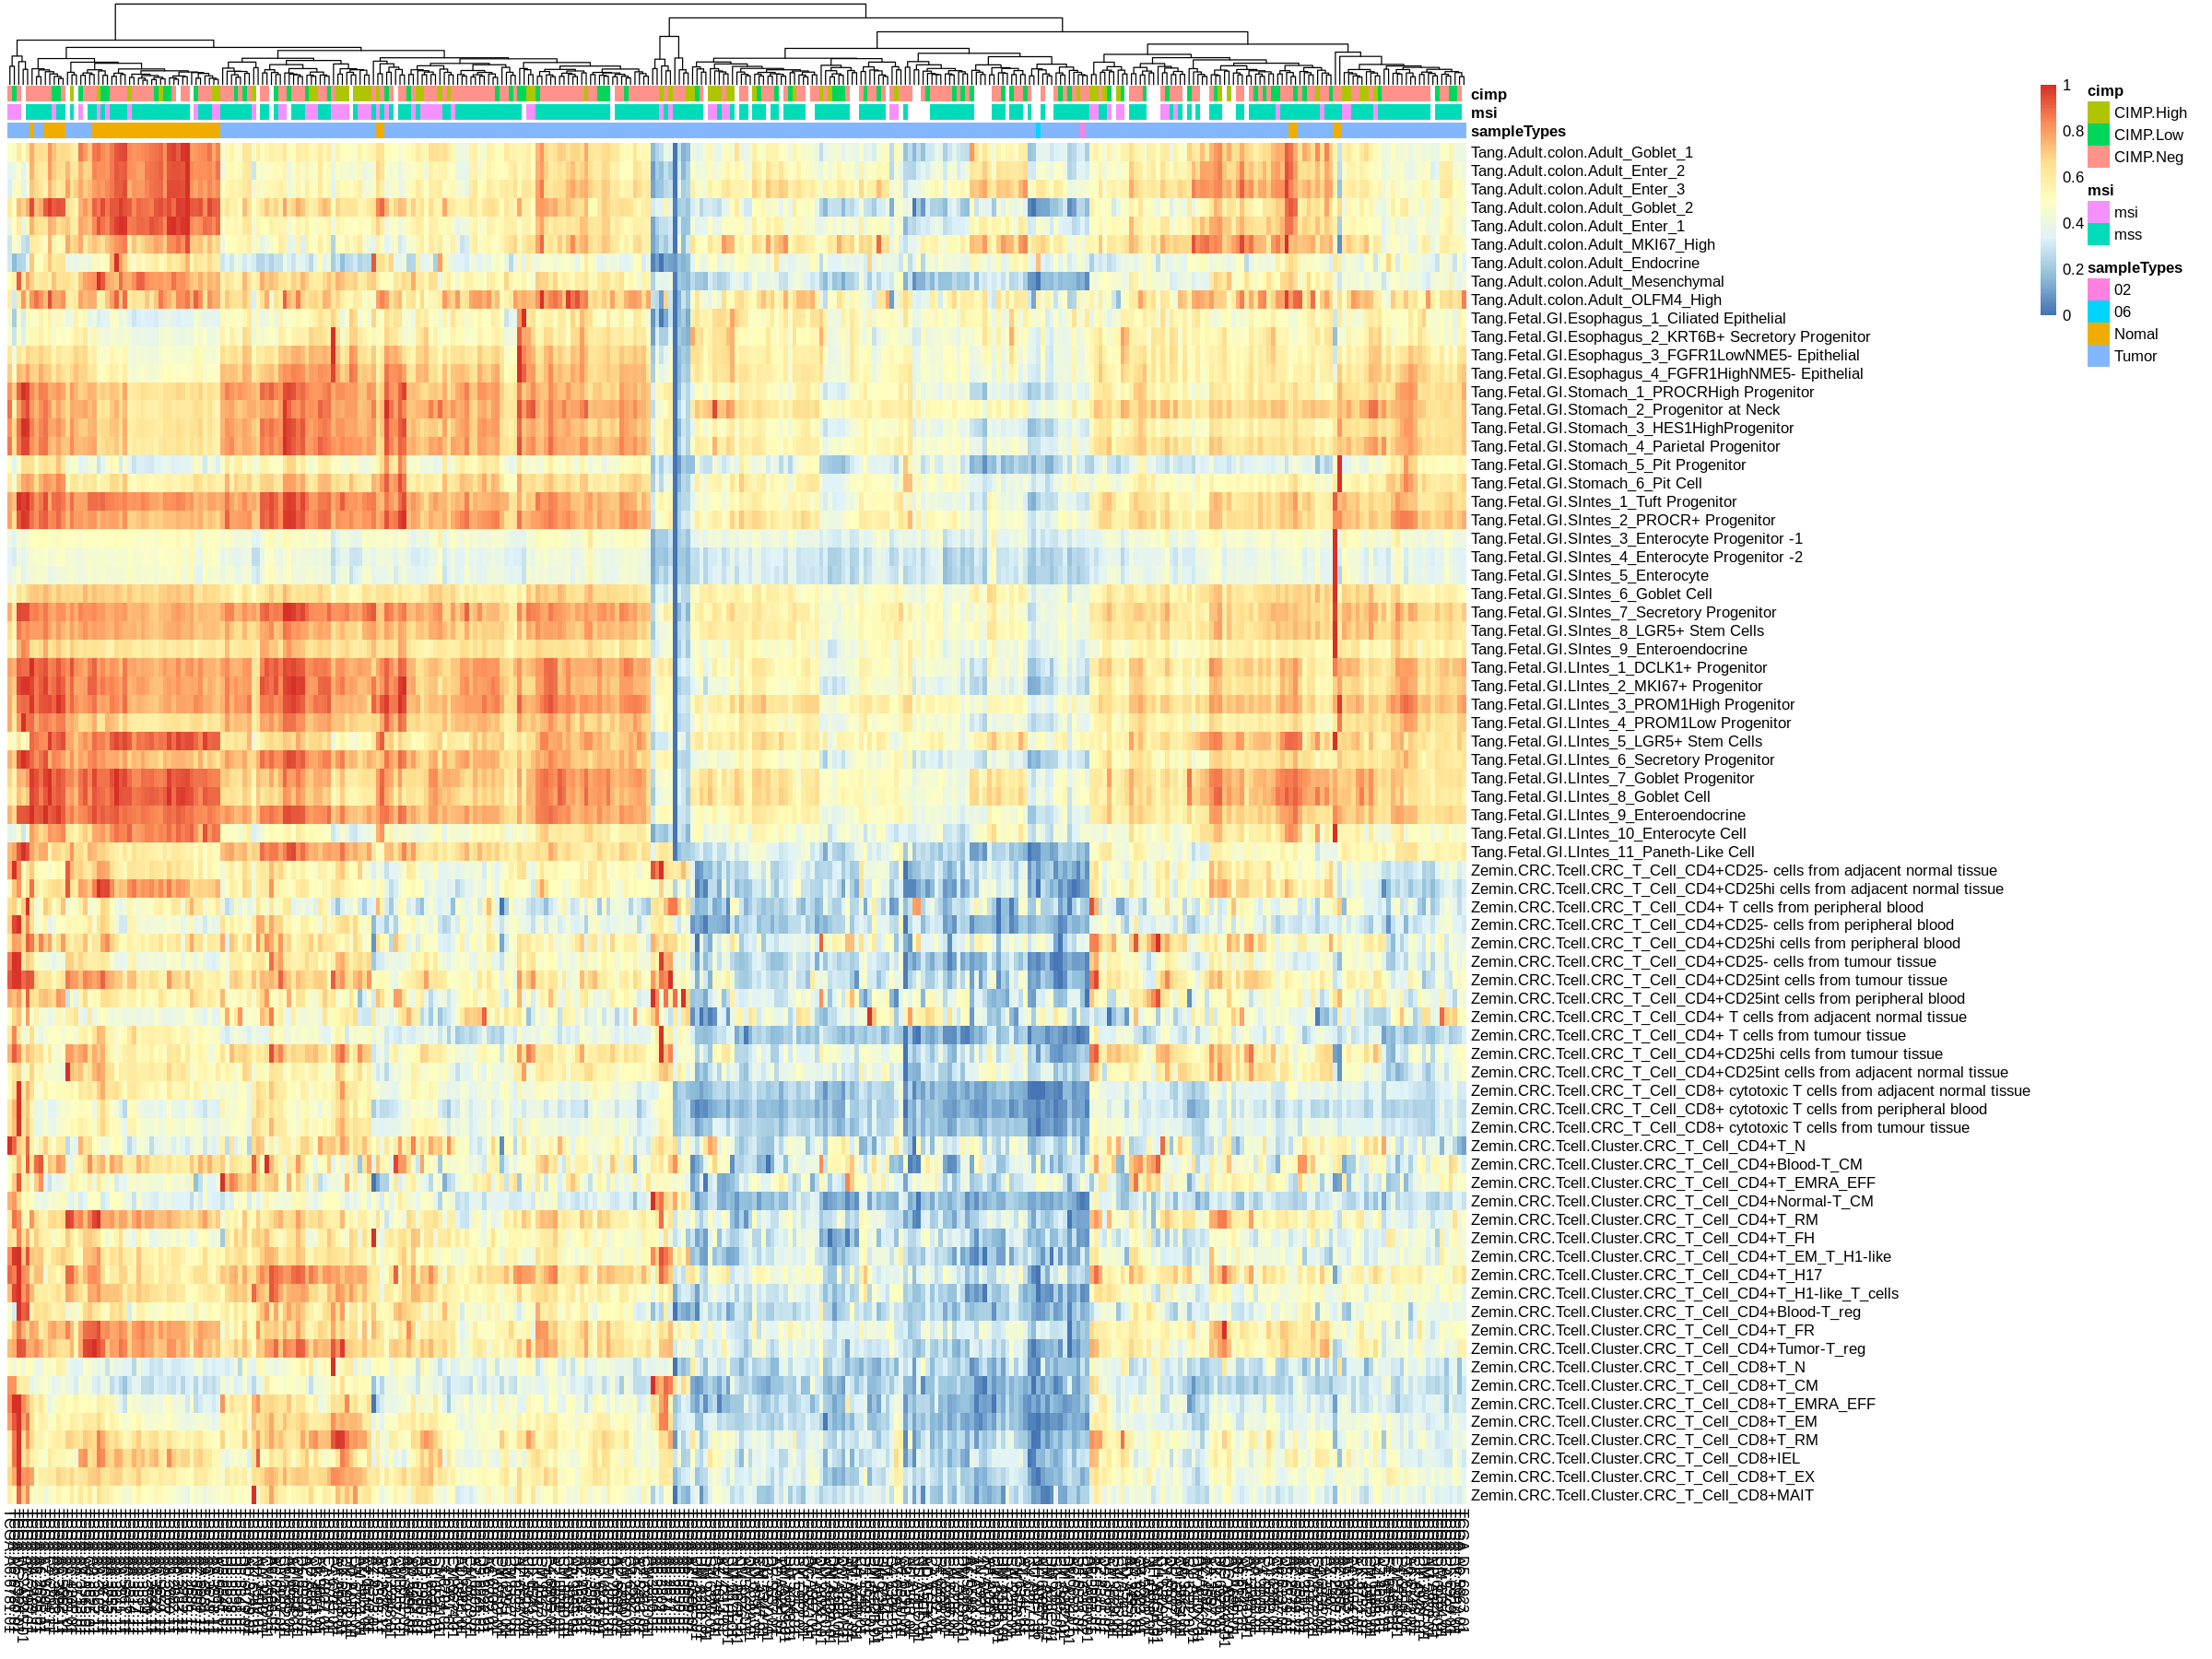

In [18]:
##### 4500
#rownames(Trans.Rang1.cv8000)
options(repr.plot.width=20, repr.plot.height=15)
pheatmap::pheatmap(Trans.Rang1.cv4500,annotation_col = COAD.pheno[,c("sampleTypes","msi","cimp")],
                   show_colnames = T,cluster_rows = F,scale = "none")

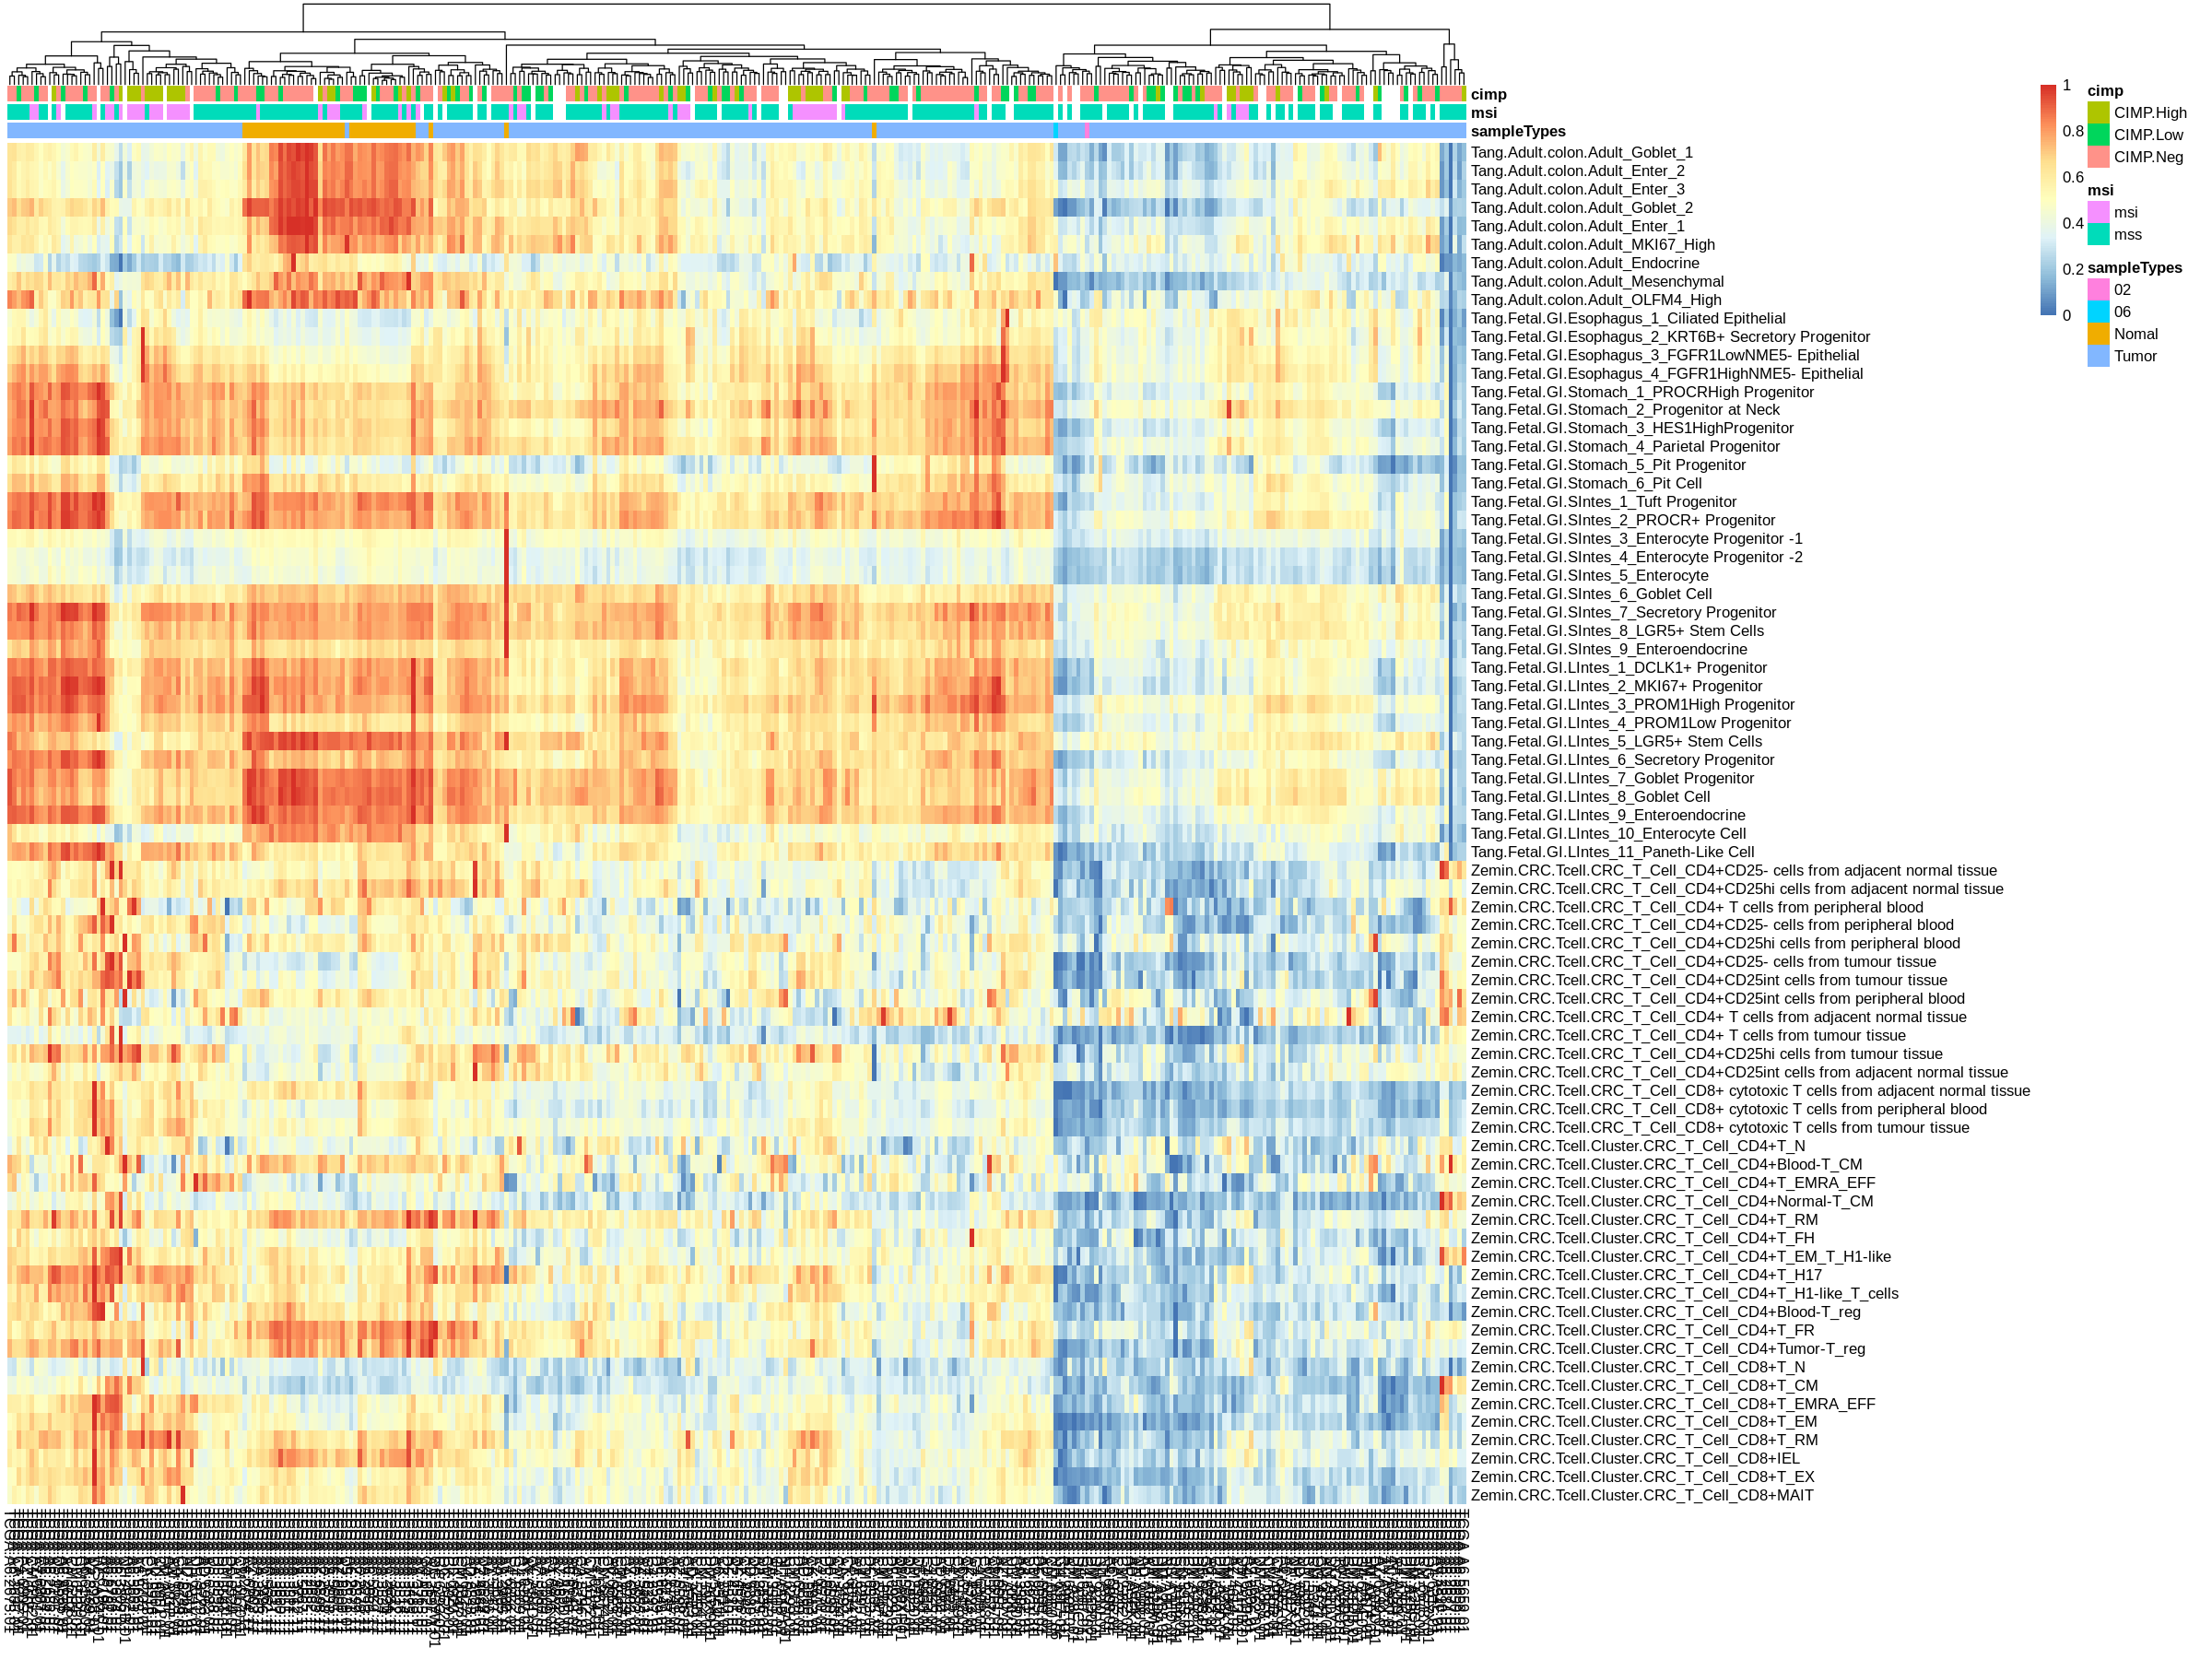

In [19]:
##### 4000
options(repr.plot.width=20, repr.plot.height=15)
pheatmap::pheatmap(Trans.Rang1.cv4000,annotation_col = COAD.pheno[,c("sampleTypes","msi","cimp")],
                   show_colnames = T,cluster_rows = F,scale = "none")

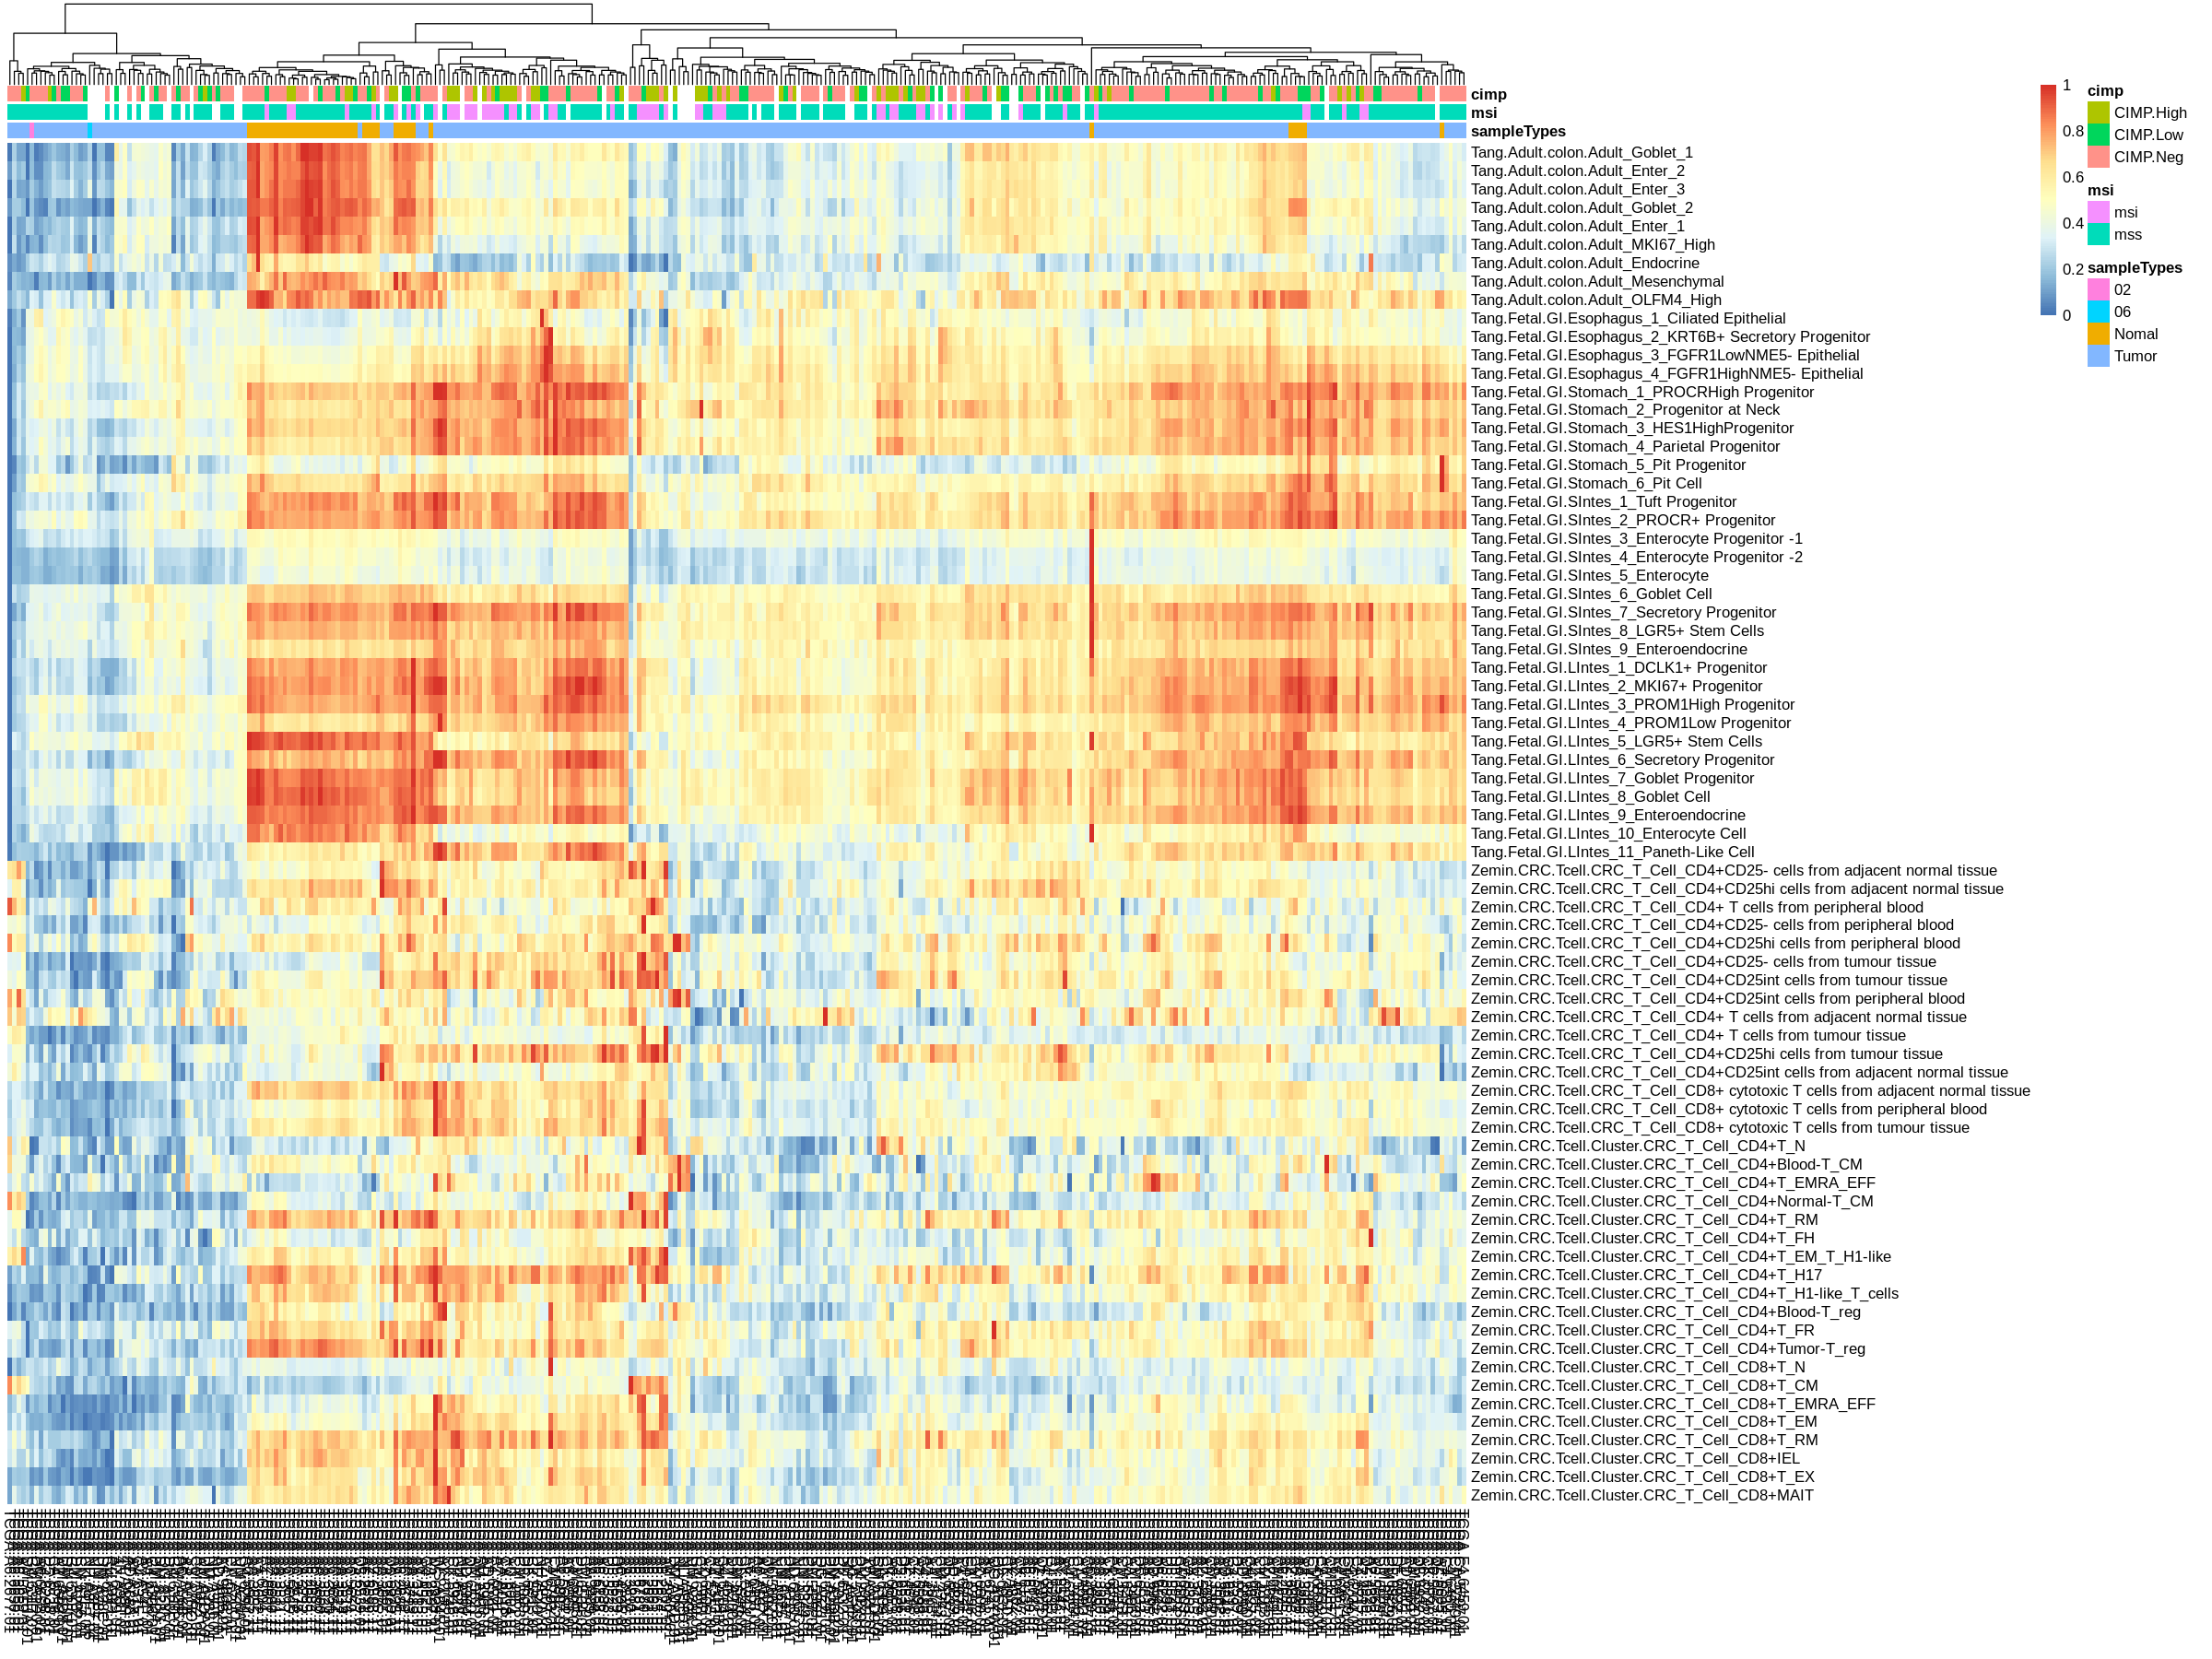

In [20]:
##### 3500
options(repr.plot.width=20, repr.plot.height=15)
pheatmap::pheatmap(Trans.Rang1.cv3500,annotation_col = COAD.pheno[,c("sampleTypes","msi","cimp")],
                   show_colnames = T,cluster_rows = F,scale = "none")

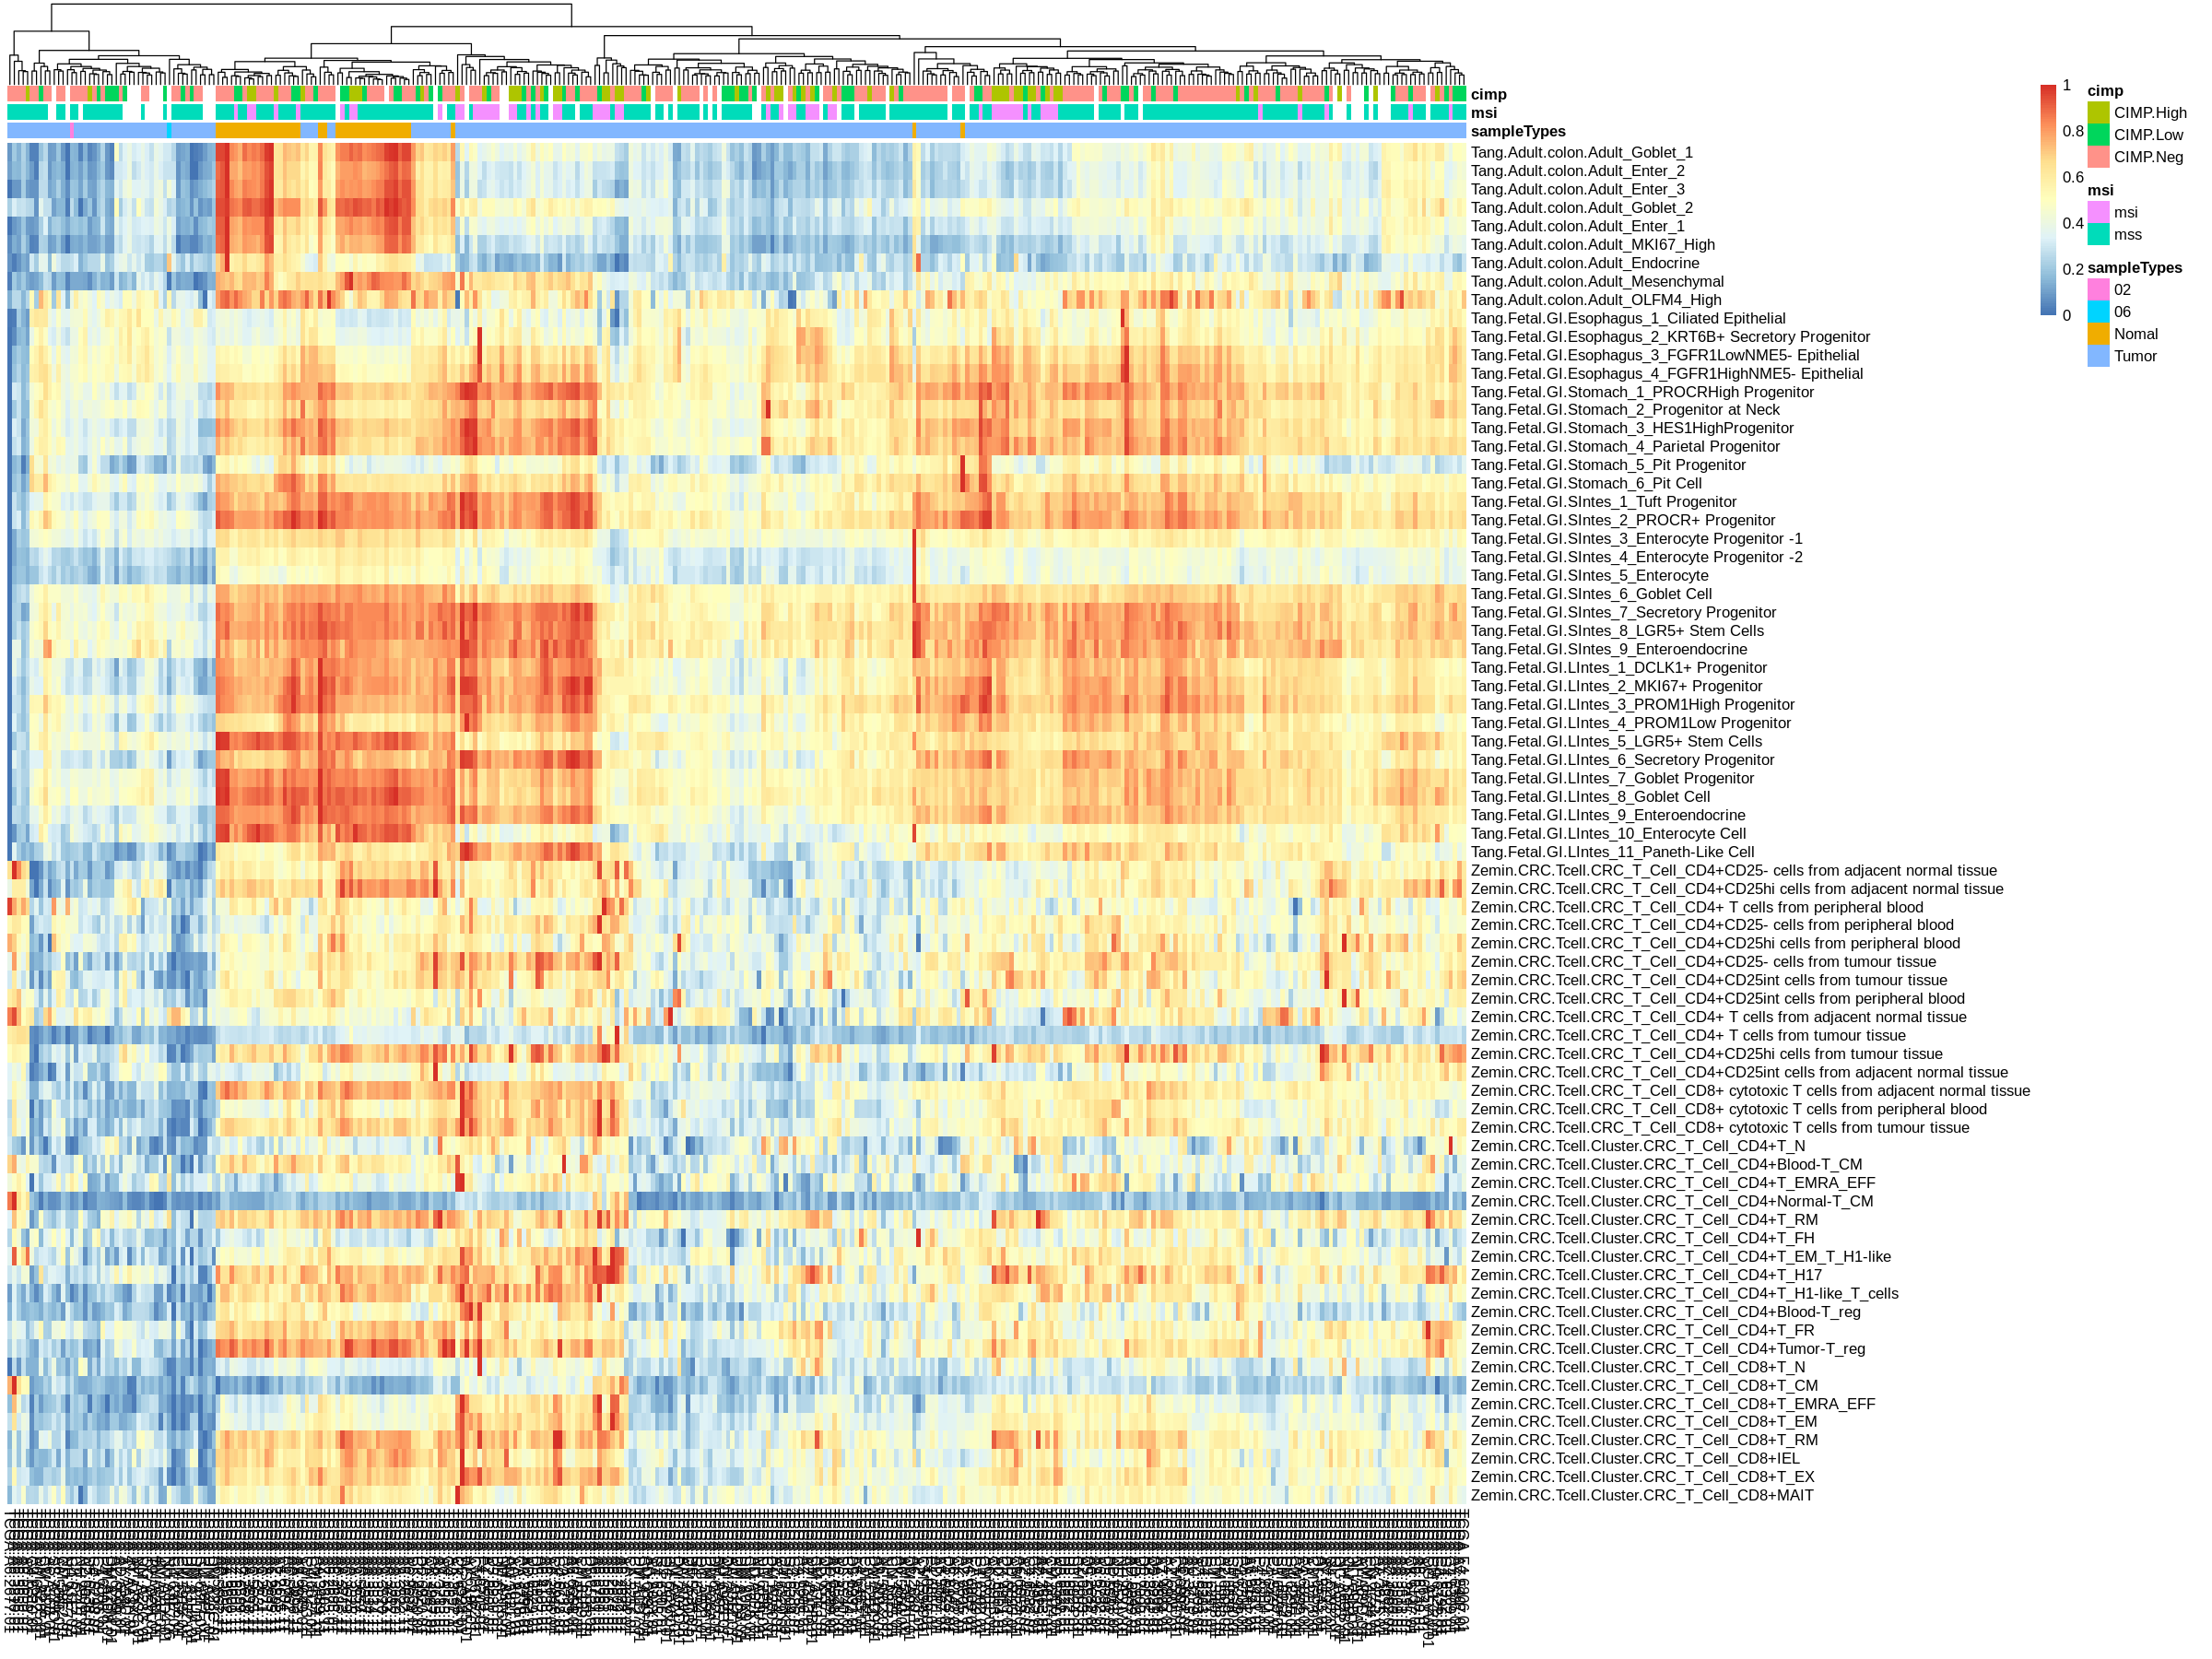

In [21]:
##### 3000
options(repr.plot.width=20, repr.plot.height=15)
pheatmap::pheatmap(Trans.Rang1.cv3000,annotation_col = COAD.pheno[,c("sampleTypes","msi","cimp")],
                   show_colnames = T,cluster_rows = F,scale = "none")

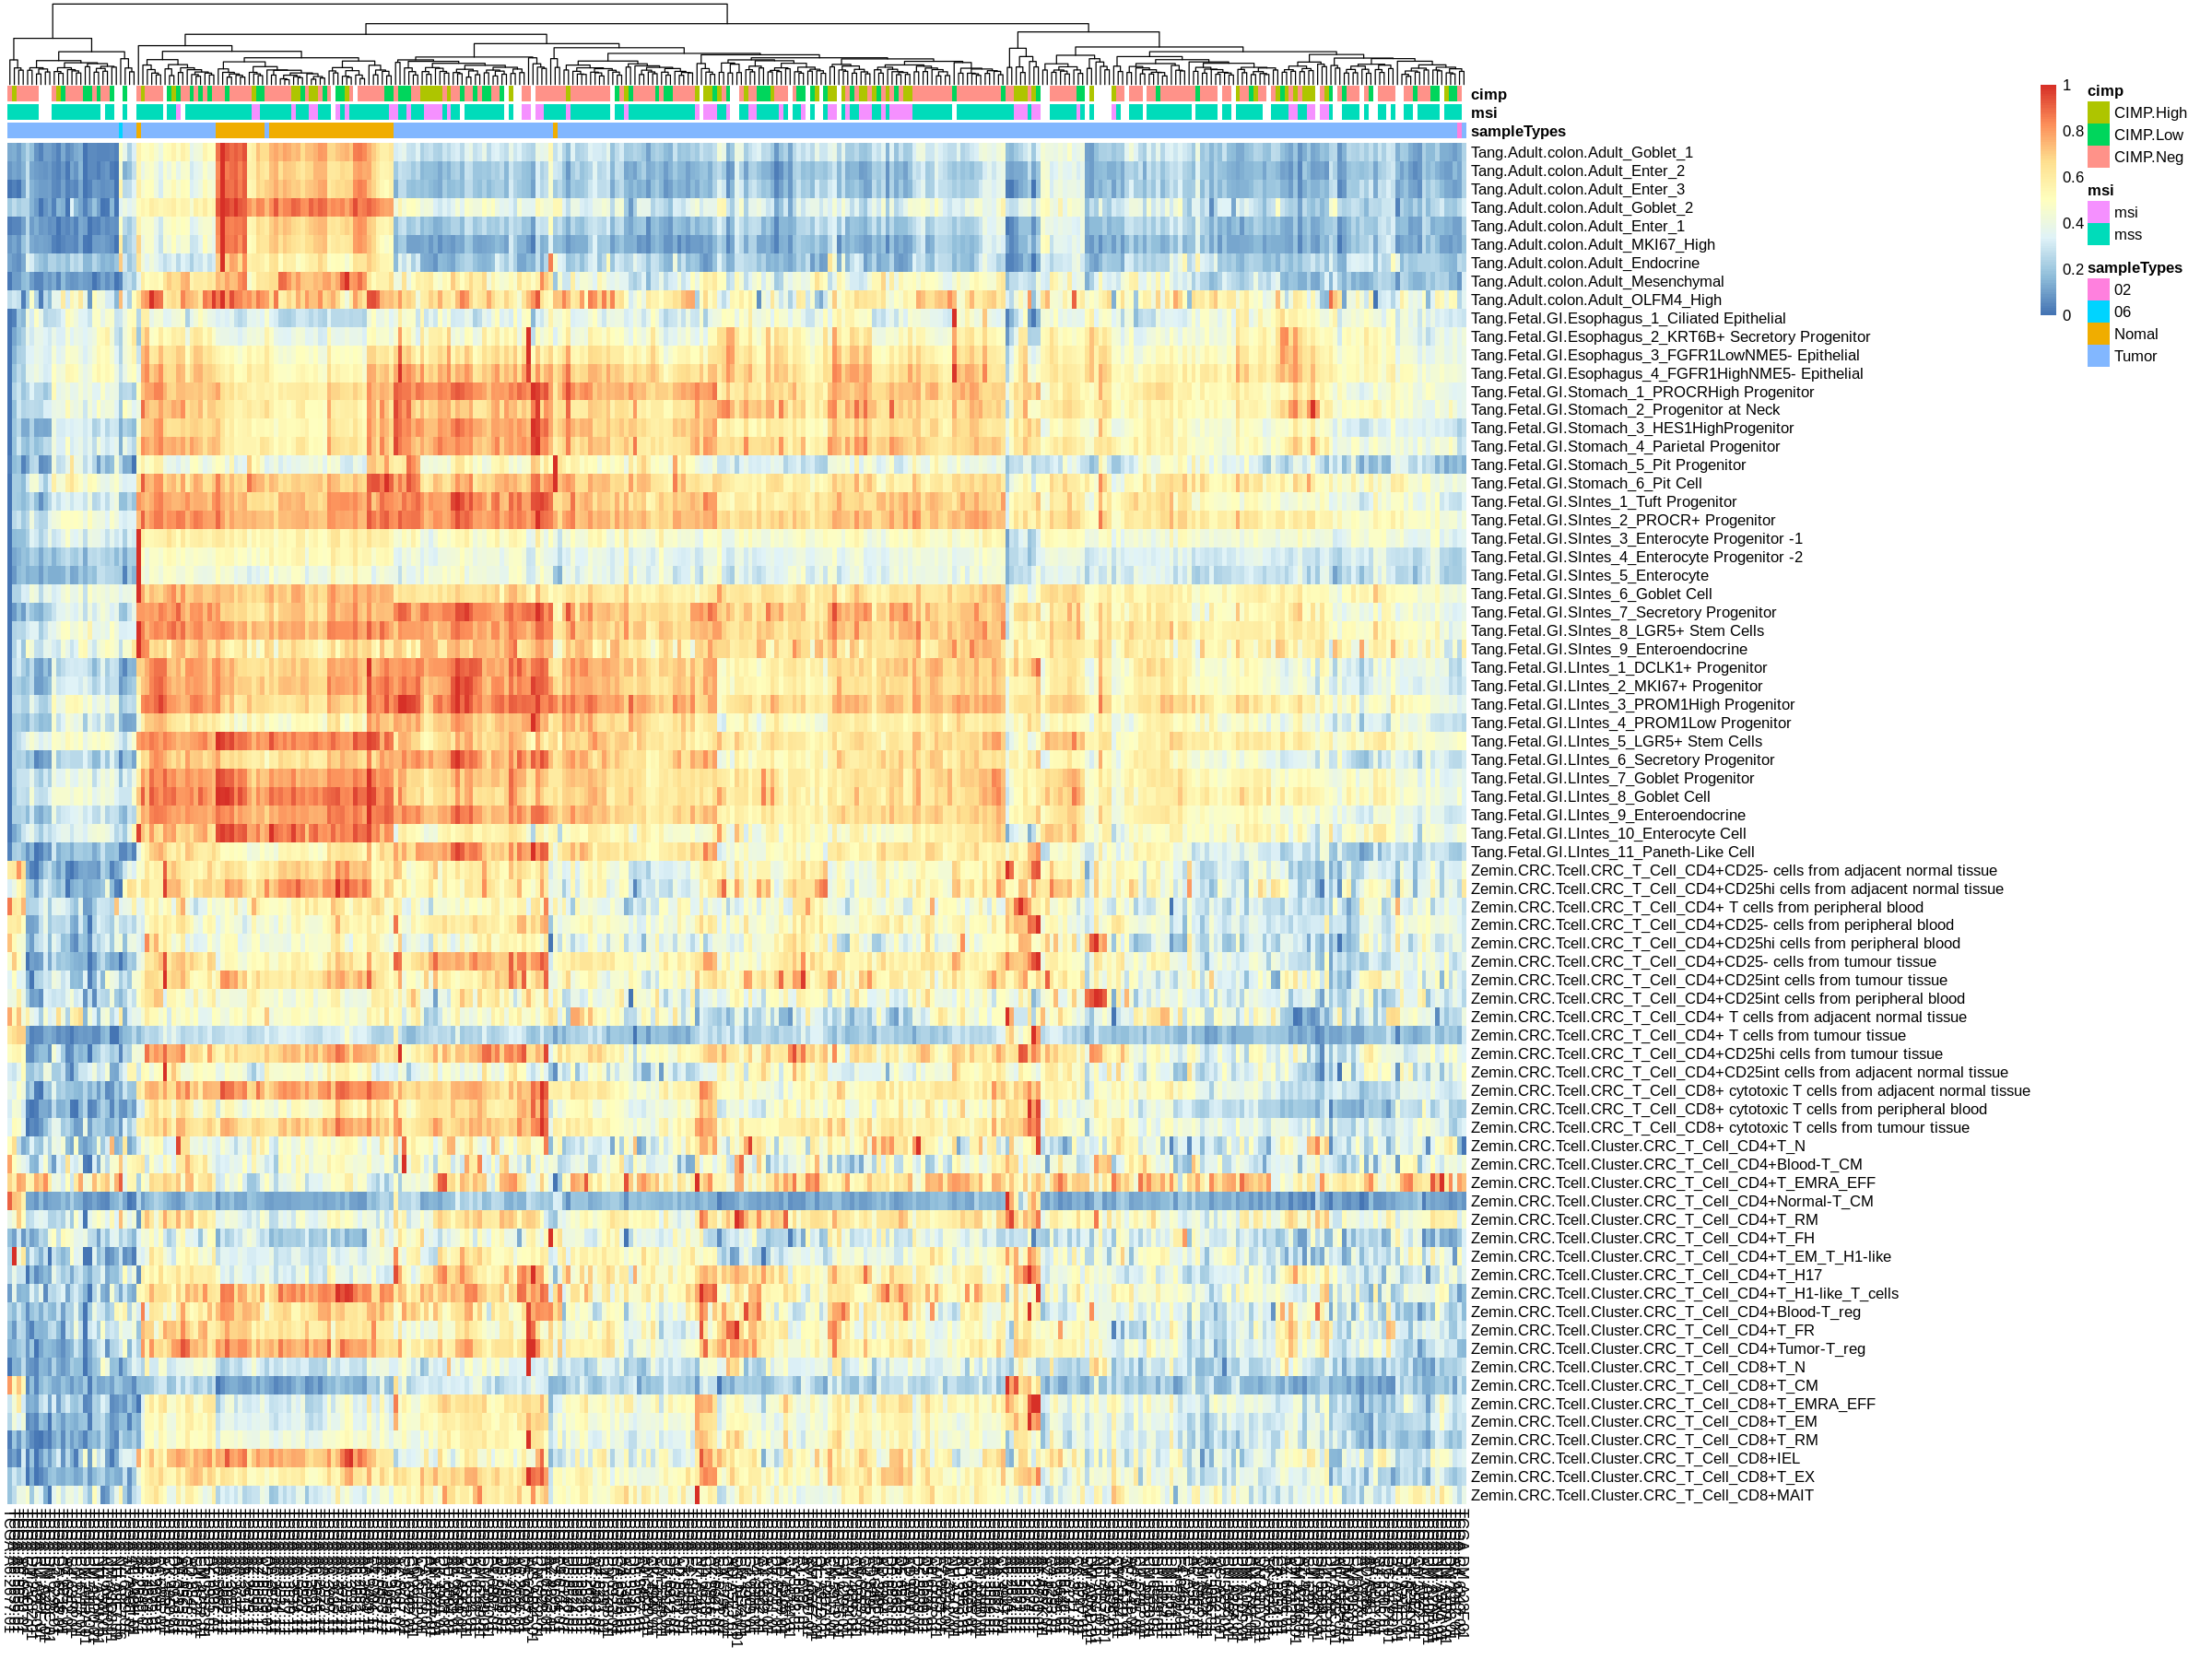

In [22]:
##### 2500
options(repr.plot.width=20, repr.plot.height=15)
pheatmap::pheatmap(Trans.Rang1.cv2500,annotation_col = COAD.pheno[,c("sampleTypes","msi","cimp")],
                   show_colnames = T,cluster_rows = F,scale = "none")

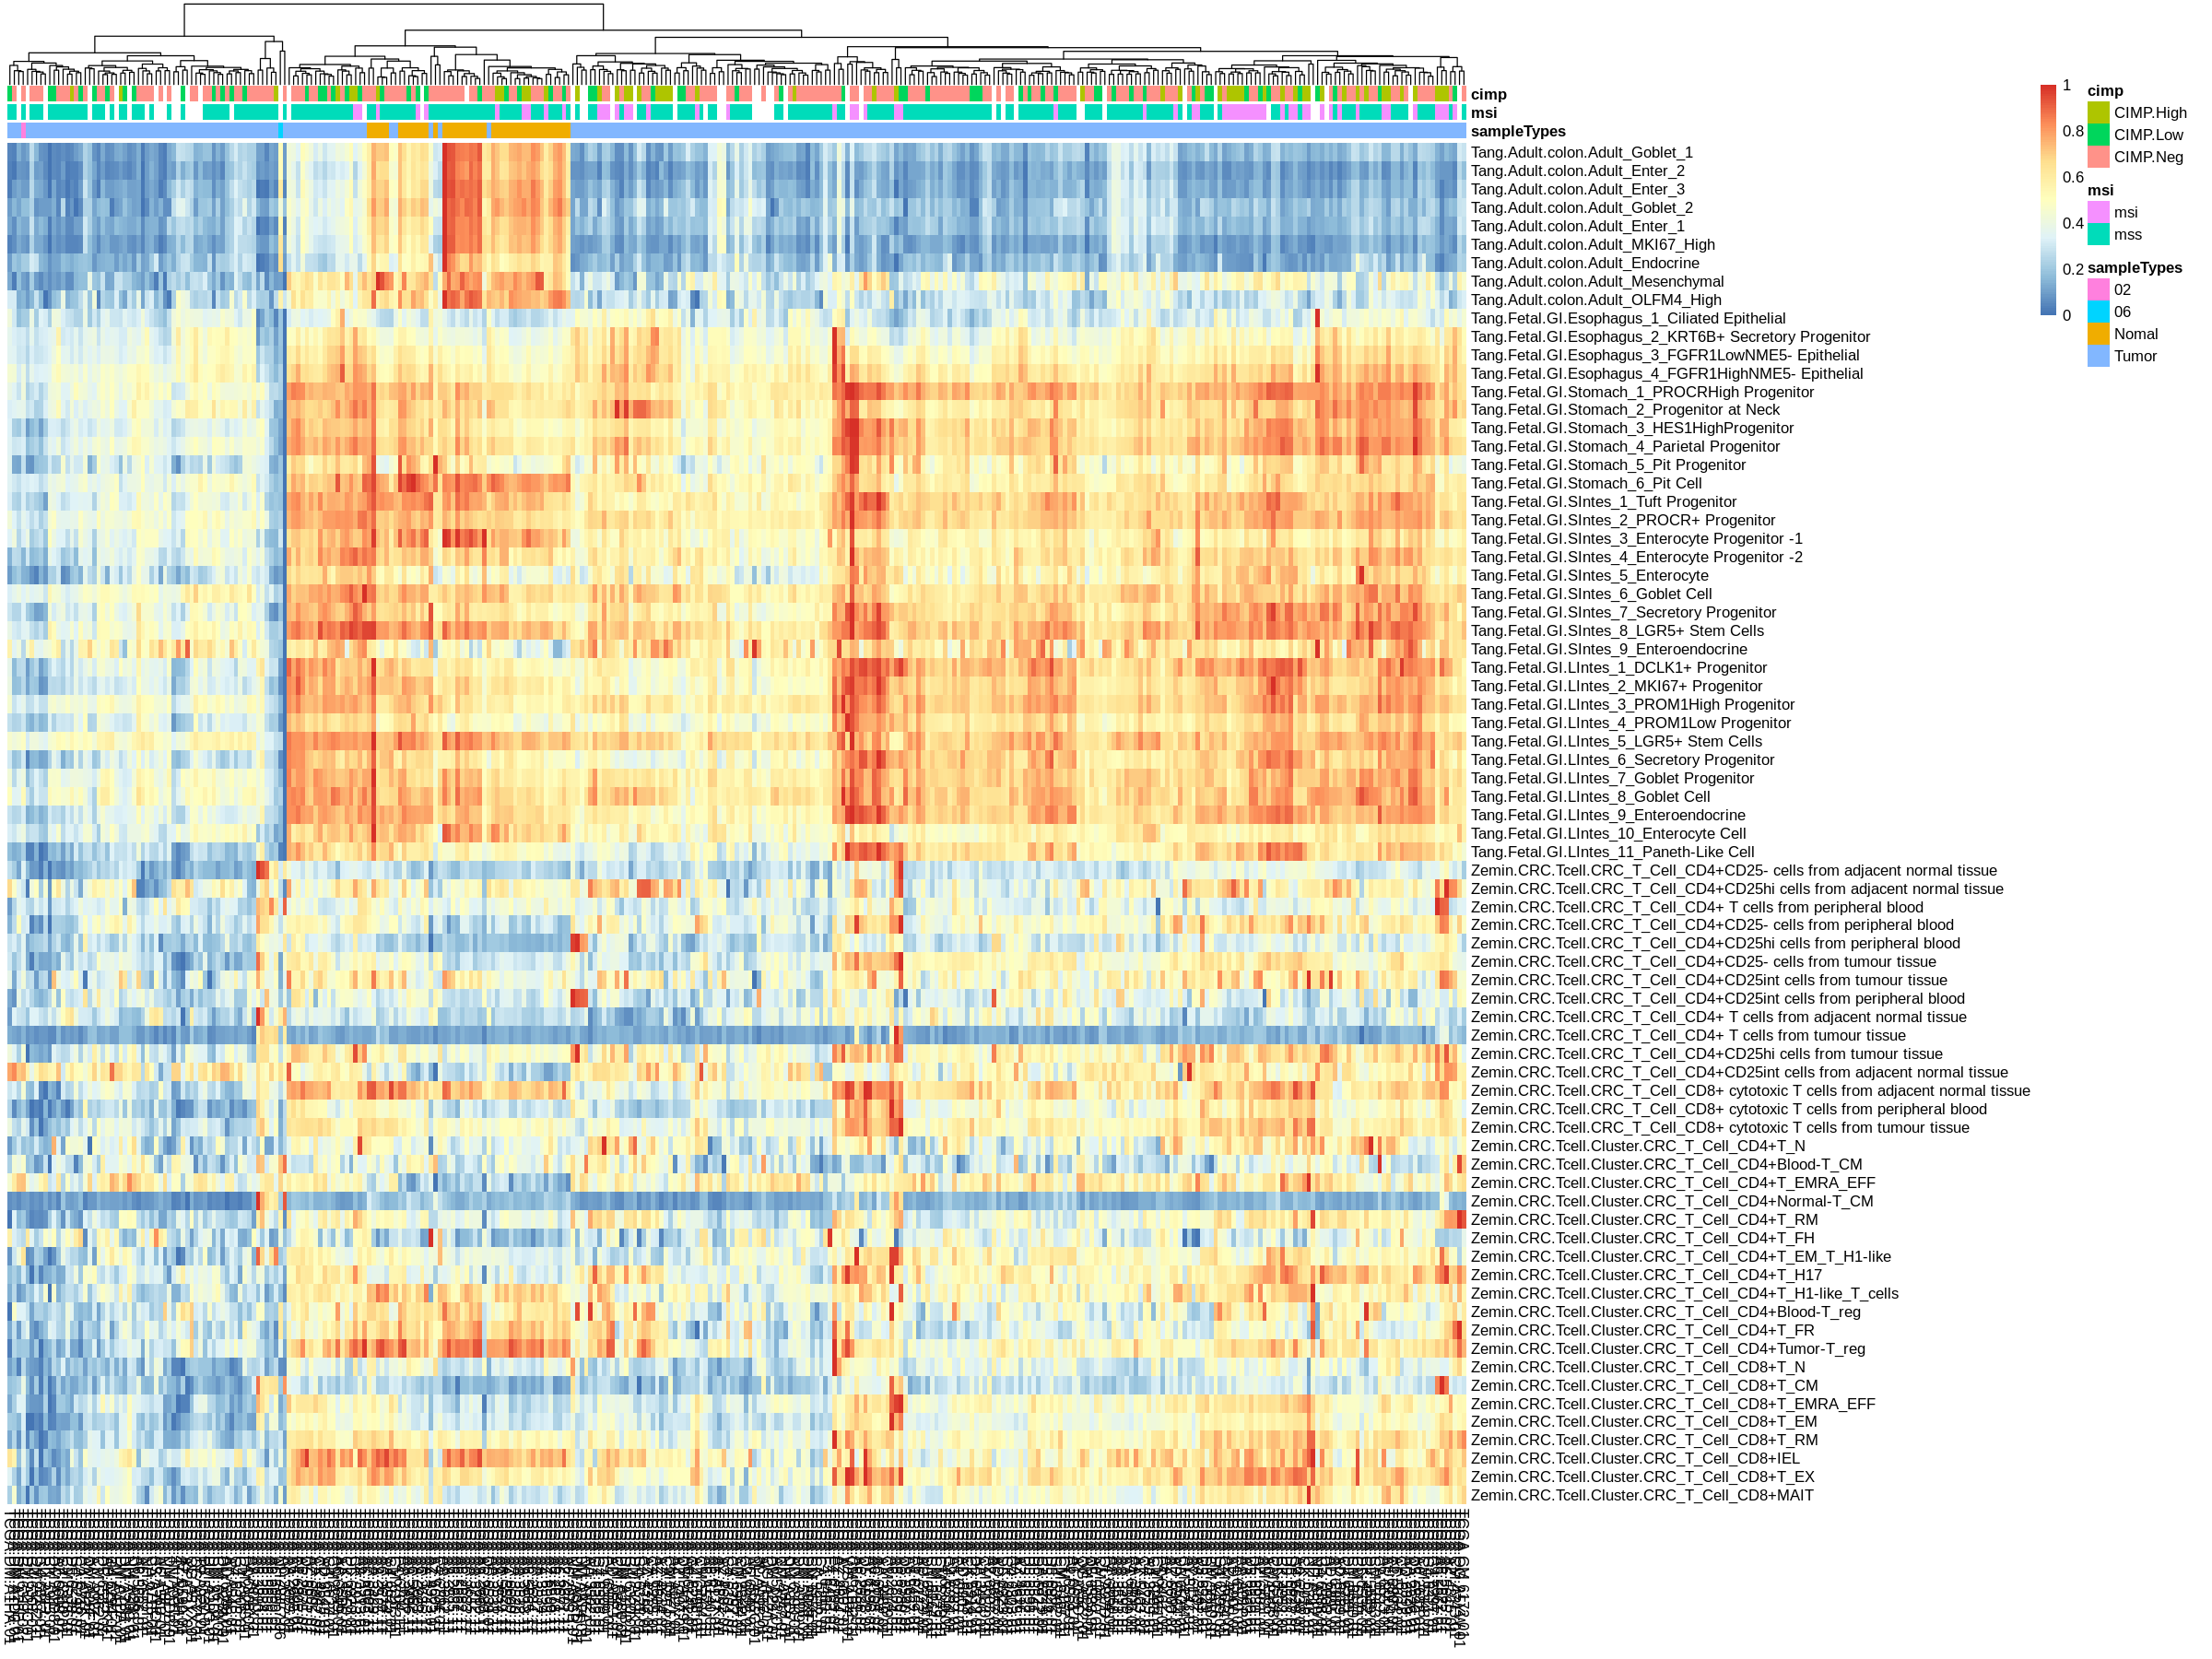

In [23]:
##### 2000
options(repr.plot.width=20, repr.plot.height=15)
pheatmap::pheatmap(Trans.Rang1.cv2000,annotation_col = COAD.pheno[,c("sampleTypes","msi","cimp")],
                   show_colnames = T,cluster_rows = F,scale = "none")